In [11]:
from transformers import AutoImageProcessor, AutoModel
import torch
from PIL import Image
import requests

In [12]:
processor = AutoImageProcessor.from_pretrained("ETH-CVG/lightglue_superpoint")
model = AutoModel.from_pretrained("ETH-CVG/lightglue_superpoint")

In [16]:
url_image1 = "./CUT3R/examples/005/frame_0.png"
image1 = Image.open(url_image1)
url_image2 = "./CUT3R/examples/005/frame_1.png"
image2 = Image.open(url_image2)

images = [image1, image2]

For the image pair 0
Keypoint at coordinate [229  11] in the first image matches with keypoint at coordinate [229  11] in the second image with a score of 0.9719433784484863.
Keypoint at coordinate [65 13] in the first image matches with keypoint at coordinate [65 12] in the second image with a score of 0.8063337802886963.
Keypoint at coordinate [205  14] in the first image matches with keypoint at coordinate [205  13] in the second image with a score of 0.9673799276351929.
Keypoint at coordinate [213  17] in the first image matches with keypoint at coordinate [213  17] in the second image with a score of 0.9845012426376343.
Keypoint at coordinate [300  17] in the first image matches with keypoint at coordinate [300  17] in the second image with a score of 0.598315954208374.
Keypoint at coordinate [45 22] in the first image matches with keypoint at coordinate [45 22] in the second image with a score of 0.8364424705505371.
Keypoint at coordinate [219  22] in the first image matches with

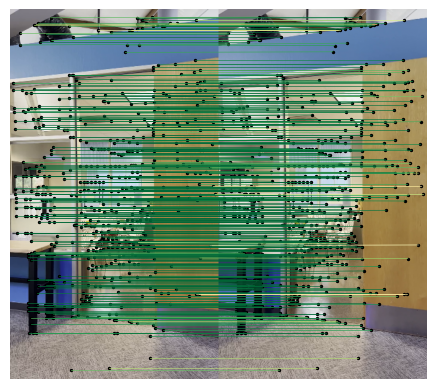

In [18]:
inputs = processor(images, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

    image_sizes = [[(image.height, image.width) for image in images]]
    outputs = processor.post_process_keypoint_matching(outputs, image_sizes, threshold=0.2)
    for i, output in enumerate(outputs):
        print("For the image pair", i)
        for keypoint0, keypoint1, matching_score in zip(
                output["keypoints0"], output["keypoints1"], output["matching_scores"]
        ):
            print(
                f"Keypoint at coordinate {keypoint0.numpy()} in the first image matches with keypoint at coordinate {keypoint1.numpy()} in the second image with a score of {matching_score}."
            )

    processor.plot_keypoint_matching(images, outputs)

